In [305]:
import os
import pandas as pd
import seaborn as sns

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties

In [84]:
path = "/home/sg666/MeMDLM/MeMDLM/benchmarks/results"

In [89]:
def make_fasta(sequences: list, label: str, filename):
    with open(filename, "w") as fasta_file:
        for i, seq in enumerate(sequences):
            fasta_file.write(f">{label}{i+1}\n{seq}\n")

In [90]:
def analyze_results(txt_file, label, df):
    with open(txt_file, "r") as file:
        lines = file.readlines()

    insides = [0] * len(df)  # List to store inside residues for each sequence

    for line in lines:
        line = line.strip()  # Remove leading/trailing whitespace

        # Check if the line contains the correct label and 'inside' keyword
        if line.startswith(f"{label}") and "inside" in line:
            # Extract the sequence index from the label
            seq_index = int(line.split()[0][len(label):]) - 1  # Extract sequence index, adjust for label length
            
            # Calculate the number of inside residues
            parts = line.split()
            start, end = int(parts[-2]), int(parts[-1])
            insides[seq_index] += (end - start + 1)

    # Add the results as a new column in the dataframe
    df[f'{label} DeepTMHMM Predictions'] = insides

    return df

### MeMDLM

In [273]:
memdlm = pd.read_csv(path + "/de_novo_mdlm.csv").dropna(inplace=False)

In [274]:
memdlm.insert(0, 'Source', 'MeMDLM')
memdlm['Sequence Length'] = memdlm[f'OG Sequence'].apply(len)
memdlm['OG DeepTMHMM Predictions'] = None
memdlm['Optimized DeepTMHMM Predictions'] = None

In [275]:
og_seqs = memdlm['OG Sequence'].tolist()
optim_seqs = memdlm['Optimized Sequence'].tolist()

In [276]:
make_fasta(og_seqs, "OG", path + "/de_novo/mdlm/og_seqs.fasta")
make_fasta(optim_seqs, "Optimized", path + "/de_novo/mdlm/optim_seqs.fasta")

In [277]:
df = analyze_results(path + "/de_novo/mdlm/optim_res.txt", "Optimized", memdlm)
df = analyze_results(path + "/de_novo/mdlm/og_res.txt", "OG", memdlm)

In [278]:
unconditional = memdlm.loc[:, memdlm.columns.str.contains('OG')]
unconditional = unconditional.dropna()
unconditional = unconditional.reset_index(drop=True)

unconditional.insert(0, 'Source', 'MeMDLM-Generated (Unconditional)')

unconditional.rename(columns={'OG Sequence': 'Sequence', "OG DeepTMHMM Predictions": "counts"}, inplace=True)

unconditional.drop(columns=['OG PPL', 'OG Solubility'], inplace=True)


unconditional['DeepTMHMM Predictions'] = 0.0
unconditional['Sequence Length'] = unconditional[f'Sequence'].apply(len)

for idx, row in unconditional.iterrows():
    unconditional.at[idx, 'DeepTMHMM Predictions'] = (row['counts'] / row['Sequence Length']) * 100
unconditional.drop(columns=['Sequence Length', 'counts'], inplace=True)

unconditional = unconditional.reset_index(drop=True)

unconditional

,Source,Sequence,DeepTMHMM Predictions
0,MeMDLM-Generated (Unconditional),EDVLFPTLNGSLGERSAMLAQATYIQSRTFRWQLEARAAQFKGVVL...,100.000000
1,MeMDLM-Generated (Unconditional),PQLIRHDGWIAELLPFLSIIVAILYSLGHVVEYGHGTQVTLYSGKE...,61.007958
2,MeMDLM-Generated (Unconditional),GSRCKLYLLFCFGAFCTITGVPNIYCGSKNGWVVTTCWGYQGDYYF...,23.936170
3,MeMDLM-Generated (Unconditional),ETVYEFADNNVILPPEELAATVQWRGAGALVQASFVGGLWRATGDV...,58.372093
4,MeMDLM-Generated (Unconditional),LGMLKLEKGQPARIGYKVMLRAIGAKDYRNPEYSHVYHRLQGIIAQ...,13.450292
...,...,...,...
73,MeMDLM-Generated (Unconditional),PAEYKFRKRFLIRTAVETFVLFLAALVVLSAANYDIFALKYRQSAE...,52.027027
74,MeMDLM-Generated (Unconditional),FFSLPQANFEPGKNLYISSKPSQNWVLRVGDFTLEYCKTAYAAALI...,100.000000
75,MeMDLM-Generated (Unconditional),SGLSVIVAFVGGTTFPIENHVNASAVNGVNGRISGIGAYVTSKPRY...,100.000000
76,MeMDLM-Generated (Unconditional),VKEIEKQSTERIASLFIIINISSVFFGHFVYQVLSKIFDDIFAFLT...,70.362473


In [279]:
conditional = memdlm.loc[:, memdlm.columns.str.contains('Optimized')]
conditional = conditional.dropna()
conditional = conditional.reset_index(drop=True)

conditional.insert(0, 'Source', 'MeMDLM-Generated (Guided)')

conditional.rename(columns={'Optimized Sequence': 'Sequence', "Optimized DeepTMHMM Predictions": "counts"}, inplace=True)

conditional.drop(columns=['Optimized PPL', 'Optimized Solubility'], inplace=True)

conditional['DeepTMHMM Predictions'] = 0.0
conditional['Sequence Length'] = conditional[f'Sequence'].apply(len)

for idx, row in conditional.iterrows():
    conditional.at[idx, 'DeepTMHMM Predictions'] = (row['counts'] / row['Sequence Length']) * 100
conditional.drop(columns=['Sequence Length', 'counts'], inplace=True)

conditional = conditional.reset_index(drop=True)

conditional

conditional

,Source,Sequence,DeepTMHMM Predictions
0,MeMDLM-Generated (Guided),EACLYISGLGVNCARALRLGHVLCVLGTNERXDFILAPLYLEIHYV...,100.000000
1,MeMDLM-Generated (Guided),PQSTSLKYASVGDRPNHYKVSLIPRKLIQIESGLDDISDHHNMVLD...,100.000000
2,MeMDLM-Generated (Guided),KLLYLGLMEGIIAPCVPPHDGLALYGAVVEFIARLQSNFVIIAEWW...,100.000000
3,MeMDLM-Generated (Guided),FSAGKTENQYQYAIREWDIVTRFLDKIVLVLLAESDTINVGEYACR...,100.000000
4,MeMDLM-Generated (Guided),SRLSFVCLALGFGMLGKIIWGAAVVVLKMGSZLTVILATRKYCNQN...,74.269006
...,...,...,...
73,MeMDLM-Generated (Guided),DVENWTQISPCGGGTPFTLKTWEDYYENNVAZQMLKRNAFVGMWHH...,100.000000
74,MeMDLM-Generated (Guided),TLKLFMTKNITGVRFNQVRYLGQKKYIYDTQLSPIFYPSVFPIRQW...,100.000000
75,MeMDLM-Generated (Guided),LQASDWPINPFEIAGALSMADELQFICRRSQDILVDLFAIPTCIHS...,100.000000
76,MeMDLM-Generated (Guided),NGGIIQVTGQYLRNRFTENAVADVYLTERGLWQKYCGLLITPIYQL...,100.000000


### Test Set

In [280]:
test = pd.read_csv("/home/sg666/MeMDLM/MeMDLM/data/membrane/test.csv").dropna(inplace=False)

In [281]:
test.insert(0, 'Source', 'Test Set (Annotated)')
test['Sequence Length'] = test[f'Sequence'].apply(len)

In [282]:
lowercase_seqs = test['Sequence'].tolist()
counts = []

for idx, seq in enumerate(lowercase_seqs):
    count = sum(1 for char in seq if char.islower())
    counts.append(count)

In [283]:
test['counts'] = counts
test['DeepTMHMM Predictions'] = 0

In [284]:
for idx, row in test.iterrows():
    test.at[idx, 'DeepTMHMM Predictions'] = (row['counts'] / row['Sequence Length']) * 100

test.drop(columns=['Sequence Length', 'counts'], inplace=True)


/tmp/ipykernel_3552197/2878986481.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '67.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.at[idx, 'DeepTMHMM Predictions'] = (row['counts'] / row['Sequence Length']) * 100


In [285]:
test

,Source,Sequence,DeepTMHMM Predictions
0,Test Set (Annotated),LSRLMIAGLMVFLVLSLVVLLAGRLpFtpqpapvtgntyrtyvnda...,67.500000
1,Test Set (Annotated),ssriagdttgkytpnifspetpmdrsfshvpknpfweawvfrrdni...,76.576577
2,Test Set (Annotated),sllknyppsylypfrhpkPEGVIEKVLFNLGSLFRSAGQGMDELGs...,90.584416
3,Test Set (Annotated),amktlekVNYKGFIWPLAVGIVLWLITPWrpgglsvqAWEMFAIFV...,31.288344
4,Test Set (Annotated),amktlekVNYKGFIWPLAVGIVLWLITPWrpgglsvqAWEMFAIFV...,31.083845
...,...,...,...
765,Test Set (Annotated),raavniefrdlsysvpgyktllkgisgkfnsgelvaimgpsgagks...,68.620038
766,Test Set (Annotated),raavniefrdlsysvllkgisgkfnsgelvaimgpsgagkstlmni...,69.174312
767,Test Set (Annotated),rcHRWc,50.000000
768,Test Set (Annotated),plKTLVLASVVLTYVLMVFGGIVTstgsglgcpdwplchgqllpfq...,31.954887


### ProtGPT-2

### Combine and plot results

In [307]:
font_path = "/home/sg666/MeMDLM/MeMDLM/src/utils/ubuntu_font/"

regular_font_path = os.path.join(font_path + 'Ubuntu-Regular.ttf')
bold_font_path = os.path.join(font_path + 'Ubuntu-Bold.ttf')
italic_font_path = os.path.join(font_path + 'Ubuntu-Italic.ttf')
bold_italic_font_path = os.path.join(font_path + 'Ubuntu-BoldItalic.ttf')

# Load the font properties
regular_font = FontProperties(fname=regular_font_path)
bold_font = FontProperties(fname=bold_font_path)
italic_font = FontProperties(fname=italic_font_path)
bold_italic_font = FontProperties(fname=bold_italic_font_path)

# Add the fonts to the font manager
fm.fontManager.addfont(regular_font_path)
fm.fontManager.addfont(bold_font_path)
fm.fontManager.addfont(italic_font_path)
fm.fontManager.addfont(bold_italic_font_path)

# Set the font family globally to Ubuntu
plt.rcParams['font.family'] = regular_font.get_name()
plt.rcParams['font.family'] = regular_font.get_name()
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = regular_font.get_name()
plt.rcParams['mathtext.it'] = italic_font.get_name()
plt.rcParams['mathtext.bf'] = bold_font.get_name()

/tmp/ipykernel_3552197/3754701887.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


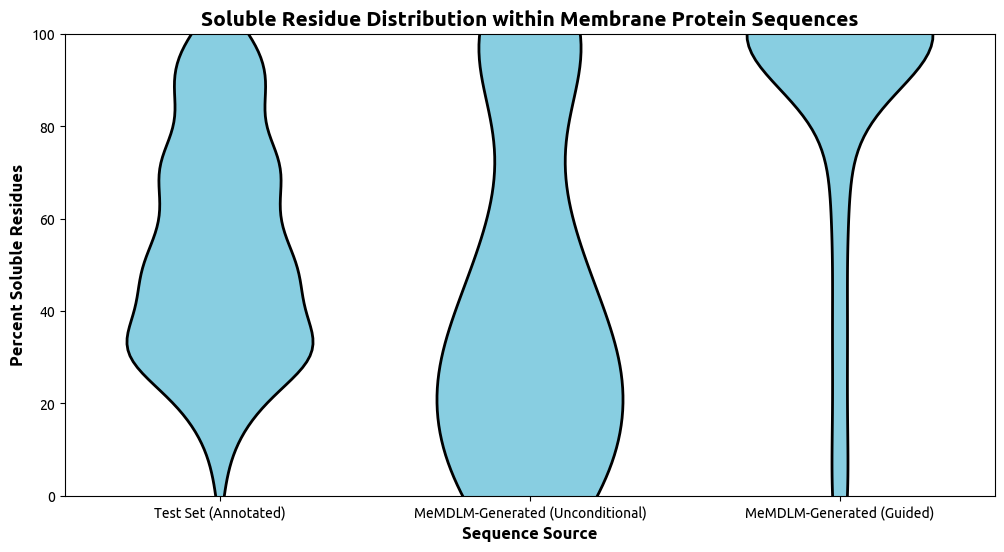

In [336]:
df_combined = pd.concat([test, unconditional, conditional], ignore_index=True)

df_combined = df_combined.rename(columns={"Source": "Sequence Source", "DeepTMHMM Predictions": "Percent Soluble Residues"})

plt.figure(figsize=(12, 6))  

sns.violinplot(
    x="Sequence Source",
    y="Percent Soluble Residues",
    data=df_combined,
    inner=None,  
    linewidth=2,  
    width=0.6,  
    scale="width", 
    color="#79D7F0",
    edgecolor="black"
)

plt.xlabel("Sequence Source", fontsize=12, fontproperties=bold_font)
plt.ylabel("Percent Soluble Residues", fontsize=12, fontproperties=bold_font)

bold_font.set_size(15) 
plt.title("Soluble Residue Distribution within Membrane Protein Sequences", fontsize=15, fontproperties=bold_font) 

plt.xticks(fontsize=12, fontproperties=regular_font)

plt.ylim(0, 100)

plt.savefig(path + '/de_novo/soluble_distribution.png', dpi=300)  # Save at 300 DPI

plt.show()